### **Please submit the different parts of Module 4 in separate notebooks.**

**Please enter your name and email in the textbox below, and state whether or not you are planning to take the next available Module 4 Assessment.  This way, we will make sure you receive feedback on the assignment as soon as possible.**

*Name*: Khai Nguyen

*Email*: khailuu.nguyen@sjsu.edu

*I plan to take the next available Module 4 Assessment*: **Yes**

# Module 4, Part 1

Please complete this assignment in a Colab.  

Please submit all parts of the Module 4 assignment as separate notebooks in the Canvas assignment for Module 4 ("Module 4 Assignment").

# Section 0: Setup & Initialization 

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from google.colab import drive

In [ ]:
# mounting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/S4.txt", delim_whitespace = True, names = ['a','b'])
df.head(3)

,a,b
0,624474,837604
1,673412,735362
2,647442,677000


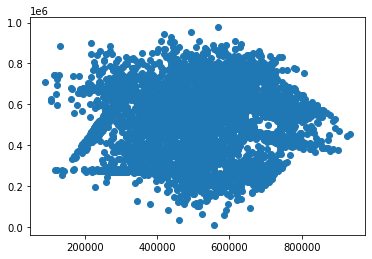

In [ ]:
# plotting the dataset
plt.scatter(x = df["a"], y = df["b"])

# Section 2: Kmeans algorithm implementation

### 1\. Implement a function to compute Euclidean Distance

In [ ]:
# function to calculate euclidean distance
def euclidean_dist(p1, p2):
    dist = 0.0
    for i in range(len(p1)): dist += (p1[i] - p2[i])**2
    return math.sqrt(dist)

### 2\.  Complete the implemeantation of the kmeans_fit() method for the Kmeans algorithms

In [ ]:
# get the index of the smallest value in an array
a = [495, 33,294,1]
print(min(a))

1


In [ ]:
print(a.index(min(a)) )

3


In [ ]:
# cluster_assignment in the form:
# {
#     0: [points],
#     1: [points]
# }

In [ ]:
# calculate the average of current poins in array
b = [[4,9,2],
     [8,3,1],
     [10,4,5],
     [5,8,7]
     ]
np.sum(b, 0)

array([27, 24, 15])

In [ ]:
np.sum(b, 0)/len(b)

array([6.75, 6.  , 3.75])

In [ ]:
def kmeans_fit(data, k = 8, change_level = 0.001, max_iter = 300):
  centroids = {} # keep track of the points that are the current centroids of the k clusters
  cluster_assignment = {} # keep track of the data points assigned to each cluster

  # pick k points to be the first cluster centers (or centroids)
  for i in range(k): 
    centroids[i] = data[i]

  # iterating for max_iter number of times
  for i in range(max_iter): 

    #initializing classification with empty lists
    for i in range(k): 
      cluster_assignment[i] = []

    # iterating over each data point
    for current_data_point in data:
      
      # calculating the euclidean distance between the current_data_point and all the centroids
      # ADD CODE HERE
      distances = []
      for j in range(len(centroids)):
        dist = euclidean_dist(centroids[j], current_data_point)
        distances.append(dist)
        

      # assign the current_data_point to the centroid it is closest to
      # ADD CODE HERE
      cluster_index = distances.index( min(distances) )
      cluster_assignment[cluster_index].append(current_data_point)

    # updating the centroids to be the average of the current points assigned to 
    # the respective centroid's cluster 
    prev_centroids = dict(centroids)    
    for cluster_index in cluster_assignment: 
      # ADD CODE HERE
      avg_point = np.sum(cluster_assignment[cluster_index], 0) / len(cluster_assignment[cluster_index])
      centroids[cluster_index] = avg_point

    # checking if the change in the centroid assignment is below a threshold - 
    # if so, we can stop the computation (we don't need to optimize the algorithm further)
    optimized = True

    for c in centroids:
      original_centroid = prev_centroids[c]
      current_centroid = centroids[c]
      if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > change_level: optimized = False

    if optimized: break

    return centroids, cluster_assignment

### 3\. Complete the implementation of the kmeans_predict() method for the kmeans algorithm

In [ ]:
# find the best cluster for a test data point based on which centroid it is closest to
def kmeans_predict(test_data, centroids):
  
  dist = []
  for i in range( len(centroids) ):
    dist.append( euclidean_dist(test_data, centroids[i]) )
  
  cluster_label = dist.index( min(dist) )
  
  return cluster_label

## Section 3: Kmeans experiments & visualization

Compute the clustering using your kmeans_fit function

In [ ]:
centroids, cluster_assignment = kmeans_fit(df.to_numpy())

In [ ]:
cluster_assignment.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
centroids

{0: array([592379.5       , 854624.42592593]),
 1: array([711232.10843373, 723148.09638554]),
 2: array([625884.08158906, 424915.27039727]),
 3: array([544184.43396226, 757139.03773585]),
 4: array([632774.19672131, 732104.37704918]),
 5: array([640913.45945946, 756933.81081081]),
 6: array([647959.6875 , 786891.15625]),
 7: array([353730.66015972, 524127.48358474])}

In [ ]:
cluster_assignment.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
centroids

{0: array([592379.5       , 854624.42592593]),
 1: array([711232.10843373, 723148.09638554]),
 2: array([625884.08158906, 424915.27039727]),
 3: array([544184.43396226, 757139.03773585]),
 4: array([632774.19672131, 732104.37704918]),
 5: array([640913.45945946, 756933.81081081]),
 6: array([647959.6875 , 786891.15625]),
 7: array([353730.66015972, 524127.48358474])}

Predict the cluster assignment for a test data point

In [ ]:
cluster_label = kmeans_predict([711000, 720000.09638554], centroids)
cluster_label

1

Visualization of the clusters

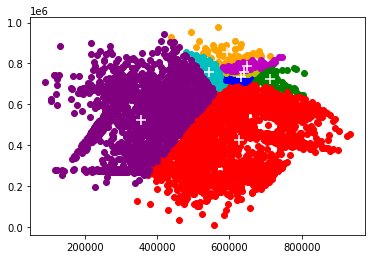

In [ ]:
## Plotting the points and the centroids.
colors = ["orange","g","r","c","b","y","m","purple"]
 
for cluster_index in cluster_assignment:
    color = colors[cluster_index]
    for data_point in cluster_assignment[cluster_index]:
        plt.scatter(data_point[0], data_point[1], marker = "o", color = color, alpha = 1)

for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker = "+", color = "white", s = 100, linewidths = 5)

plt.show()